Proyecto 3 - Tratamiento de Datos - GRUPO #1
Este Cuaderno...

In [ ]:
#testeando conexion a db
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="mydb",
    user="postgres",
    password="example"
)

cursor = conn.cursor()
cursor.execute("SELECT version();")
print(cursor.fetchone())
cursor.close()
conn.close()

('PostgreSQL 15.12 (Debian 15.12-0+deb12u2) on x86_64-pc-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',)


### **Paso 1: Configuración inicial del Notebook**

In [4]:
# Instalar dependencias 
%pip install pandas matplotlib seaborn psycopg2-binary kaggle SQLAlchemy

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.4/602.4 kB 13.6 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Importar librerías
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

A continuacion descargamos el dataset de Kaggle - Network Intrusion dataset(CIC-IDS- 2017)

In [7]:
#Instalar Kaggle hub
%pip install kagglehub

import kagglehub
# Descargar dataset de Kaggle (necesitas API token)
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 3.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 230M/230M [00:14<00:00, 16.8MB/s] 

Extracting files...


Path to dataset files: /home/vscode/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1


Carga de datos para verificar lo que contiene, ya que el dataset tiene varios archivos, para este ejercicio vamos a tarabajar con el archivo 
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv

In [17]:
# Definimos la ruta del dataset
data_path = "/home/vscode/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"

# Leemos el dataset
df = pd.read_csv(data_path)

# Limpiamos los nombres de las columnas removiendo espacios en blanco
df.columns = df.columns.str.strip()

# Ahora mostramos las columnas para confirmar
print(df.columns.tolist())
# Mostramos las primeras filas para conocer la estructura del dataset
df.head()

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


2. Inspección y limpieza de datos
Se explora la información general del dataset (tipos de datos, estadísticas y valores nulos) para determinar qué limpieza es necesaria. En este ejemplo se eliminan duplicados y se eliminan filas con valores nulos en la columna "Label" (si existe). Adapta esta sección según los requerimientos y la estructura real del dataset.

In [15]:
# Información general del DataFrame
print("Información del dataset:")
df.info()

# Estadísticas descriptivas de columnas numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificamos si existen valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())

# Ejemplo de limpieza:
# Eliminamos filas duplicadas
df = df.drop_duplicates()

# Si existen nulos en la columna 'Label' (o en otra que consideres clave), se eliminan esas filas
if 'Label' in df.columns:
    df = df.dropna(subset=['Label'])

# Se podría aplicar más limpieza o imputación según la columna y el análisis deseado
print("\nInformación del dataset tras la limpieza:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 164300 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             164300 non-null  int64  
 1    Flow Duration                164300 non-null  int64  
 2    Total Fwd Packets            164300 non-null  int64  
 3    Total Backward Packets       164300 non-null  int64  
 4   Total Length of Fwd Packets   164300 non-null  int64  
 5    Total Length of Bwd Packets  164300 non-null  int64  
 6    Fwd Packet Length Max        164300 non-null  int64  
 7    Fwd Packet Length Min        164300 non-null  int64  
 8    Fwd Packet Length Mean       164300 non-null  float64
 9    Fwd Packet Length Std        164300 non-null  float64
 10  Bwd Packet Length Max         164300 non-null  int64  
 11   Bwd Packet Length Min        164300 non-null  int64  
 12   Bwd Packet Length Mean 

3. Creación de gráficos
A continuación se generan cuatro gráficos diferentes para visualizar distintos aspectos del dataset, en el siguiente orden:
Gráfico 1: Histograma de "Flow Duration"
Gráfico 2: Conteo de ocurrencias por "Label"
Gráfico 3: Boxplot de "Flow Duration"
Gráfico 3: Boxplot de "Flow Duration"

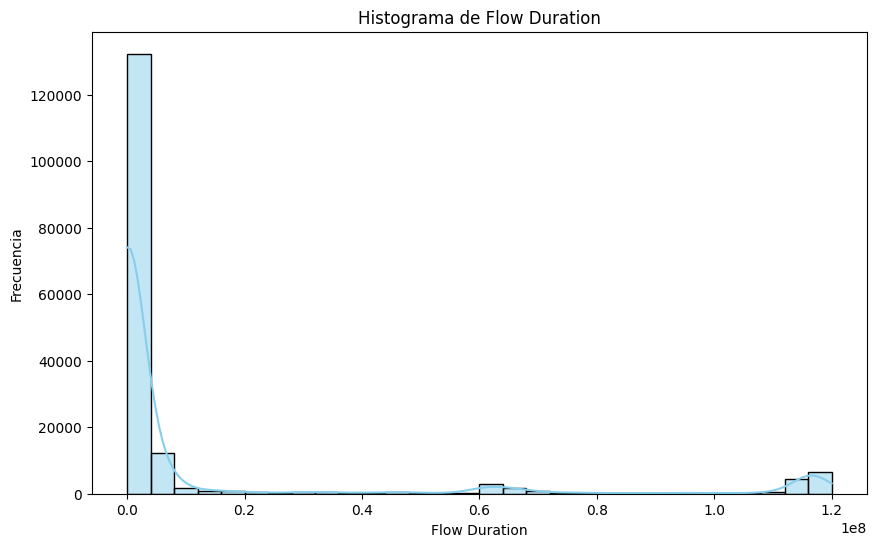

In [ ]:
#Grafico #1
if 'Flow Duration' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Flow Duration'], bins=30, kde=True, color='skyblue')
    plt.title('Histograma de Flow Duration')
    plt.xlabel('Flow Duration')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("La columna 'Flow Duration' no se encuentra en el dataset.")



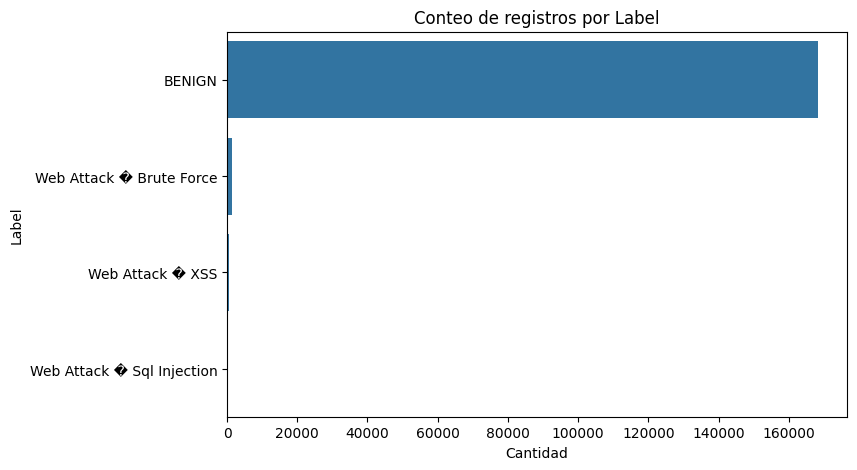

In [ ]:
#Grafico #2: 'Label' representa el tipo de ataque.
if 'Label' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(y='Label', data=df, order=df['Label'].value_counts().index)
    plt.title('Conteo de registros por Label')
    plt.xlabel('Cantidad')
    plt.ylabel('Label')
    plt.show()
else:
    print("La columna 'Label' no se encuentra en el dataset.")


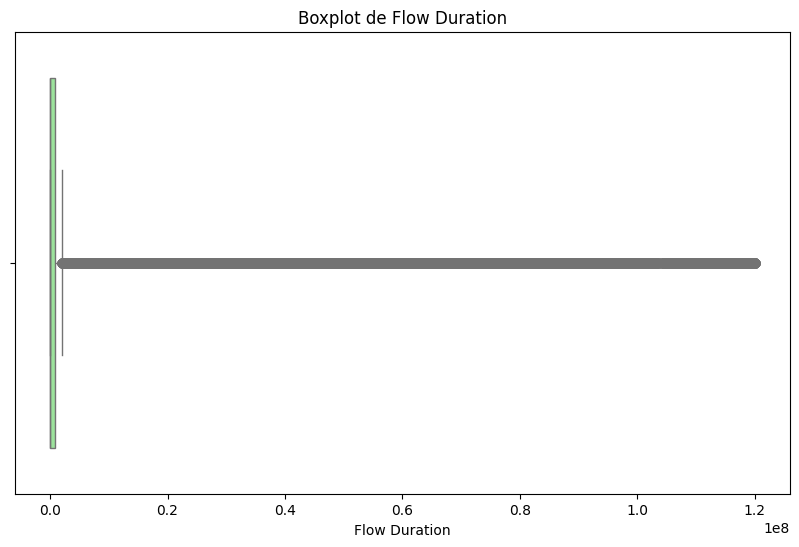

In [ ]:
#Grafico #3
if 'Flow Duration' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Flow Duration'], color='lightgreen')
    plt.title('Boxplot de Flow Duration')
    plt.xlabel('Flow Duration')
    plt.show()
else:
    print("La columna 'Flow Duration' no se encuentra en el dataset.")


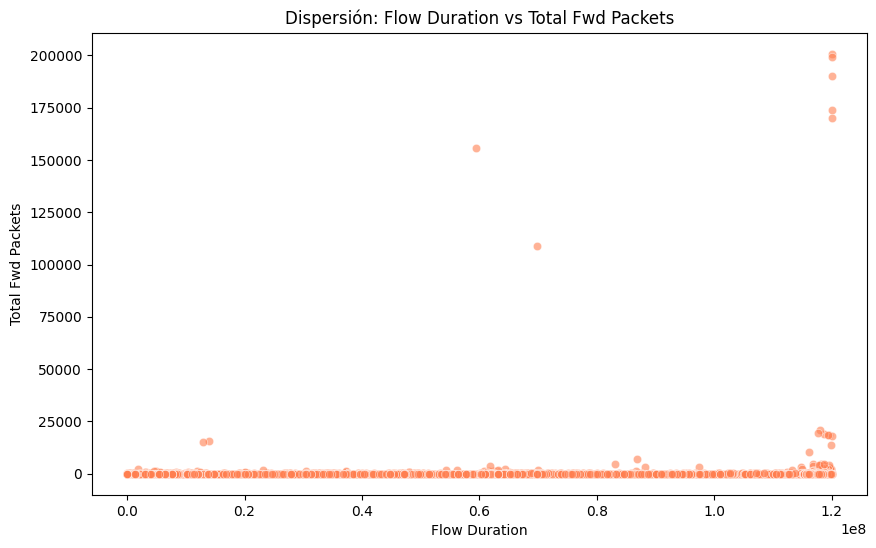

In [ ]:
#Grafico #4
if ('Flow Duration' in df.columns) and ('Total Fwd Packets' in df.columns):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Flow Duration', y='Total Fwd Packets', data=df, alpha=0.6, color='coral')
    plt.title('Dispersión: Flow Duration vs Total Fwd Packets')
    plt.xlabel('Flow Duration')
    plt.ylabel('Total Fwd Packets')
    plt.show()
else:
    print("La columna 'Flow Duration' y/o 'Total Fwd Packets' no se encuentran en el dataset.")


4. Inserción de 10 registros preprocesados en PostgreSQL
En este ejemplo se seleccionan los primeros 10 registros del DataFrame limpio y se insertan en una tabla de PostgreSQL. La tabla se crea dinámicamente y se utiliza el tipo TEXT para simplificar, pero puedes ajustar según la naturaleza de cada columna.

In [22]:
# Seleccionamos 10 registros preprocesados
df_preprocessed = df.head(10)

# Convertimos el DataFrame a una lista de tuplas para la inserción
data_to_insert = [tuple(x) for x in df_preprocessed.values]
columns = list(df_preprocessed.columns)
print("Columnas a insertar:", columns)

# Conexión a la base de datos PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="mydb",
    user="postgres",
    password="example"
)
cursor = conn.cursor()

# Definimos el nombre de la tabla
table_name = "preprocessed_data"

# Construimos la sentencia para crear la tabla (usamos TEXT para simplificar)
create_table_query = f"CREATE TABLE IF NOT EXISTS {table_name} (id SERIAL PRIMARY KEY, " + \
    ", ".join([f'"{col}" TEXT' for col in columns]) + ");"

cursor.execute(create_table_query)
conn.commit()
print("Tabla creada o verificada.")

# Inserción de datos: se crea la sentencia de inserción de forma dinámica
placeholders = ", ".join(["%s"] * len(columns))
insert_query = f"INSERT INTO {table_name} (" + ", ".join([f'"{col}"' for col in columns]) + f") VALUES ({placeholders});"

for record in data_to_insert:
    # Convertimos cada valor a cadena para simplificar la inserción
    record_str = [str(item) for item in record]
    cursor.execute(insert_query, record_str)

conn.commit()
print("Datos insertados correctamente.")

# Cerramos la conexión
cursor.close()
conn.close()


Columnas a insertar: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Co